# Week 7 Lab: Text Analytics

<img align="right" style="padding-right:10px;" src="figures_wk7/text_mining.png" width=400><br>

This week's assignment will focus on text analysis of BBC News articles.

## Our Dataset: 
**Dataset:** bbc.csv(Provided in folder assign_wk7)<br>
Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005. <br>
Class Labels: 5 (business, entertainment, politics, sport, tech)

## Text Analytics Lab

**Objective:** 
To demostrate all of the text analysis techniques covered int his week's lecture material. Your submission needs to include the following:
   - Preparation of the text data for analysis
       * Things to consider: stopwords, punctuation, digits, mixed case words
   - Identify the 10 most frequently used words in the text
       * How about the ten least frequently used words? 
       * How does lemmatization change the most/least frequent words?
           - Explain and demonstrate this topic
   - Generate a world cloud for the text
   - Demonstrate the generation of n-grams and part of speech tagging
   - Create a Topic model of the text
       * Find the optimal number of topics
       * test the accuracy of your model
       * Display your results 2 different ways.
           1) Print the topics and explain any insights at this point.
           2) Graph the topics and explain any insights at this point.


### Deliverables:

Upload your notebook's .ipynb file and your topic_model_viz.html page this week.
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

Reference:
> Graphic comes from https://medium.com/nanonets/topic-modeling-with-lsa-psla-lda-and-lda2vec-555ff65b0b05

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the BBC dataset
bbc_data = pd.read_csv('C:/Users/balar/Downloads/assign_wk7/assign_wk7/bbc.csv')
bbc_data.head()


,id,news,type
0,0,UK economy facing 'major risks'\n \n The UK ma...,business
1,1,Aids and climate top Davos agenda\n \n Climate...,business
2,2,Asian quake hits European shares\n \n Shares i...,business
3,3,India power shares jump on debut\n \n Shares i...,business
4,4,Lacroix label bought by US firm\n \n Luxury go...,business


In [4]:
bbc_data.sample(10)

,id,news,type
1277,1277,Nuclear strike 'key terror risk'\n \n The UK a...,politics
2069,2069,Warnings on woeful wi-fi security\n \n Compani...,tech
1344,1344,Lewsey puzzle over disallowed try\n \n England...,sport
57,57,Survey confirms property slowdown\n \n Governm...,business
753,753,Johnny and Denise lose Passport\n \n Johnny Va...,entertainment
1124,1124,'No-one can define new hunt ban'\n \n The new ...,politics
1898,1898,Nuclear body seeks new tech\n \n The computer ...,tech
938,938,Labour seeks to quell feud talk\n \n Labour's ...,politics
1722,1722,Iranian misses Israel match\n \n Iranian strik...,sport
1560,1560,Charvis set to lose fitness bid\n \n Flanker C...,sport


In [6]:
print(bbc_data.news[3])

India power shares jump on debut
 
 Shares in India's largest power producer, National Thermal Power Corp (NTPC) have risen 13% on their stock market debut.
 
 The government's partial sell-off of NTPC is part of a controversial programme to privatise state-run firms. The 865 million share offer, a mix of new shares and sales by the government, raised 54bn rupees($1.2bn). It was India's second $1bn stock debut in three months, coming after the flotation by software firm Tata. The share offer was eleven times oversubscribed. "It is a good investment bet," said Suhas Naik, an investment analyst from ING Mutual Fund. "Power needs in India are set to rise and NTPC will benefit from that." Analysts say the success of the NTPC flotation would encourage the government to reduce stakes in more power companies. NTPC has said it will use the money from the share sale to feed the growing needs of the country's energy-starved economy. The firm is the largest utility company in India, and the sixth

 There is no extra information about the post (headers and footers).luckyly seems no additional work

We can extract a number of basic metrics about our data

#### Word Count
One of the most basic metrics we can extract is the number of words in each post. The thought process behind this is type of metric is that negative posts generally contain a lesser amount of words than positive posts do.

To do this, we simply use the split function in python:

In [16]:
bbc_data['word_cnt'] = bbc_data.news.apply(lambda x: len(str(x).split(" ")))

In [18]:
bbc_data.sample(10)

,id,news,type,word_cnt
1427,1427,Bellamy under new fire\n \n Newcastle boss Gra...,sport,254
1815,1815,Trial date is set for Balco case\n \n A US jud...,sport,304
843,843,Brit awards for Devon music acts\n \n Devon si...,entertainment,364
496,496,Europe asks Asia for euro help\n \n European l...,business,192
54,54,Wembley firm won't make a profit\n \n Shares i...,business,324
506,506,Renault boss hails 'great year'\n \n Strong sa...,business,272
827,827,De Niro film leads US box office\n \n Film sta...,entertainment,277
515,515,'Landmark movies' of 2004 hailed\n \n US film ...,entertainment,338
84,84,FAO warns on impact of subsidies\n \n Billions...,business,298
1241,1241,Immigration to be election issue\n \n Immigrat...,politics,434


from the data frame we can see word count coloumn is added at last and states no of words in each news post in a data frame

#### Character Count
This metric is also based on the previous feature intuition. Here, we calculate the number of characters in each post.

In [20]:
bbc_data['char_cnt'] = bbc_data.news.str.len()
bbc_data.sample(10)

,id,news,type,word_cnt,char_cnt
196,196,Qatar and Shell in $6bn gas deal\n \n Shell ha...,business,162,904
949,949,UKIP outspent Labour on EU poll\n \n The UK In...,politics,158,960
1257,1257,UKIP MEP attacked German 'empire'\n \n A UK In...,politics,678,3884
638,638,Baywatch dubbed 'worst TV import'\n \n Surf sh...,entertainment,204,1191
2137,2137,Poles play with GameBoy 'blip-pop'\n \n A grou...,tech,477,2799
500,500,Fiat mulls Ferrari market listing\n \n Ferrari...,business,299,1790
1841,1841,US peer-to-peer pirates convicted\n \n The fir...,tech,275,1683
1178,1178,Howard 'truanted to play snooker'\n \n Conserv...,politics,287,1598
559,559,US box office set for record high\n \n Ticket ...,entertainment,312,1830
1439,1439,Call for Kenteris to be cleared\n \n Kostas Ke...,sport,259,1555


Generally, while solving an NLP problem, the first thing we do is to remove the stopwords. But sometimes calculating the number of stopwords can also give us some extra information which we might have been losing before.

Here, we have imported stopwords from NLTK, which is a basic NLP library in python.

In [21]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

bbc_data['stopwords'] = bbc_data.news.apply(lambda x: len([x for x in x.split() if x in stop]))

In [22]:
bbc_data.sample(10)

,id,news,type,word_cnt,char_cnt,stopwords
1648,1648,Cup holders Man Utd visit Everton\n \n Holders...,sport,228,1373,62
1830,1830,Games maker fights for survival\n \n One of Br...,tech,471,2686,188
1833,1833,More women turn to net security\n \n Older peo...,tech,620,3706,237
409,409,Swiss cement firm in buying spree\n \n Swiss c...,business,254,1509,79
918,918,Howard dismisses Tory tax fears\n \n Michael H...,politics,450,2521,171
370,370,US interest rates increased to 2%\n \n US inte...,business,527,3040,186
2190,2190,Smart search lets art fans browse\n \n If you ...,tech,404,2319,174
450,450,Germany calls for EU reform\n \n German Chance...,business,382,2383,138
845,845,Berlin cheers for anti-Nazi film\n \n A German...,entertainment,305,1829,106
1612,1612,Chepkemei joins Edinburgh line-up\n \n Susan C...,sport,169,1009,61


### Data Cleaning and Prep
After loading our dataset we need to take the time to cleaning and prep the data for further analysis. I'm going to load the cleaned data into another column within the dataframe so that we can observe how the data changes as we progress.

The cleaning and prep processing generally involves:
* converting to lowercase
* removing punctuation
* removing numbers
* removing stopwords
* word tokenization
* data stemming or lemmization or both


#### Convert Text to Lowercase
The first step is data cleaning, lets convert all characters to lower case so algorithm will be more accurate.For example, ‘India’ and ‘india’ will appear as two different words.

In [25]:
bbc_data['clean_text'] = bbc_data.news.apply(lambda x: " ".join(x.lower() for x in x.split()))
bbc_data.head(20)

,id,news,type,word_cnt,char_cnt,stopwords,clean_text
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329,1996,112,uk economy facing 'major risks' the uk manufac...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454,2727,161,aids and climate top davos agenda climate chan...
2,2,Asian quake hits European shares\n \n Shares i...,business,553,3444,171,asian quake hits european shares shares in eur...
3,3,India power shares jump on debut\n \n Shares i...,business,175,1038,55,india power shares jump on debut shares in ind...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152,894,47,lacroix label bought by us firm luxury goods g...
5,5,Insurance bosses plead guilty\n \n Another thr...,business,146,920,39,insurance bosses plead guilty another three us...
6,6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,257,1539,91,turkey-iran mobile deal 'at risk' turkey's inv...
7,7,Parmalat to return to stockmarket\n \n Parmala...,business,269,1675,100,"parmalat to return to stockmarket parmalat, th..."
8,8,WorldCom director admits lying\n \n The former...,business,356,2085,129,worldcom director admits lying the former chie...
9,9,Ebbers denies WorldCom fraud\n \n Former World...,business,346,2067,125,ebbers denies worldcom fraud former worldcom c...


In [29]:
bbc_data['clean_text'] = bbc_data.clean_text.str.replace('\S+@\S+','') #looking for the case of XXXX@XXXX
bbc_data['clean_text'] = bbc_data.clean_text.str.replace('http\S+','') #looking for http or https web addresses
bbc_data['clean_text'] = bbc_data.clean_text.str.replace('\S+.com','') #looking for email addresses that end in '.com'
bbc_data['clean_text'] = bbc_data.clean_text.str.replace('\S+.edu','') #looking for email addresses that end in '.edu'
bbc_data.head(10)

,id,news,type,word_cnt,char_cnt,stopwords,clean_text
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329,1996,112,uk economy facing 'major risks' the uk manufac...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454,2727,161,aids and climate top davos agenda climate chan...
2,2,Asian quake hits European shares\n \n Shares i...,business,553,3444,171,asian quake hits european shares shares in eur...
3,3,India power shares jump on debut\n \n Shares i...,business,175,1038,55,india power shares jump on debut shares in ind...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152,894,47,lacroix label bought by us firm luxury goods g...
5,5,Insurance bosses plead guilty\n \n Another thr...,business,146,920,39,insurance bosses plead guilty another three us...
6,6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,257,1539,91,turkey-iran mobile deal 'at risk' turkey's inv...
7,7,Parmalat to return to stockmarket\n \n Parmala...,business,269,1675,100,"parmalat to return to stockmarket parmalat, th..."
8,8,WorldCom director admits lying\n \n The former...,business,356,2085,129,worldcom director admits lying the former chie...
9,9,Ebbers denies WorldCom fraud\n \n Former World...,business,346,2067,125,ebbers denies worldcom fraud former worldcom c...


#### Removing Punctuation
The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. 

In [31]:
bbc_data['clean_text'] = bbc_data.clean_text.str.replace('[^\w\s]','')
bbc_data.head(10)

,id,news,type,word_cnt,char_cnt,stopwords,clean_text
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329,1996,112,uk economy facing 'major risks' the uk manufac...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454,2727,161,aids and climate top davos agenda climate chan...
2,2,Asian quake hits European shares\n \n Shares i...,business,553,3444,171,asian quake hits european shares shares in eur...
3,3,India power shares jump on debut\n \n Shares i...,business,175,1038,55,india power shares jump on debut shares in ind...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152,894,47,lacroix label bought by us firm luxury goods g...
5,5,Insurance bosses plead guilty\n \n Another thr...,business,146,920,39,insurance bosses plead guilty another three us...
6,6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,257,1539,91,turkey-iran mobile deal 'at risk' turkey's inv...
7,7,Parmalat to return to stockmarket\n \n Parmala...,business,269,1675,100,"parmalat to return to stockmarket parmalat, th..."
8,8,WorldCom director admits lying\n \n The former...,business,356,2085,129,worldcom director admits lying the former chie...
9,9,Ebbers denies WorldCom fraud\n \n Former World...,business,346,2067,125,ebbers denies worldcom fraud former worldcom c...


#### Removing Digits
Time to remove digits from news coloumn. Like punctuations, digits dosn’t add any extra information to our analysis. 

In [32]:
bbc_data['clean_text'] = bbc_data.clean_text.str.replace('\d+','')
bbc_data.head(10)

,id,news,type,word_cnt,char_cnt,stopwords,clean_text
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329,1996,112,uk economy facing 'major risks' the uk manufac...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454,2727,161,aids and climate top davos agenda climate chan...
2,2,Asian quake hits European shares\n \n Shares i...,business,553,3444,171,asian quake hits european shares shares in eur...
3,3,India power shares jump on debut\n \n Shares i...,business,175,1038,55,india power shares jump on debut shares in ind...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152,894,47,lacroix label bought by us firm luxury goods g...
5,5,Insurance bosses plead guilty\n \n Another thr...,business,146,920,39,insurance bosses plead guilty another three us...
6,6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,257,1539,91,turkey-iran mobile deal 'at risk' turkey's inv...
7,7,Parmalat to return to stockmarket\n \n Parmala...,business,269,1675,100,"parmalat to return to stockmarket parmalat, th..."
8,8,WorldCom director admits lying\n \n The former...,business,356,2085,129,worldcom director admits lying the former chie...
9,9,Ebbers denies WorldCom fraud\n \n Former World...,business,346,2067,125,ebbers denies worldcom fraud former worldcom c...


#### Removing Stopwords
As we discussed earlier, stop words (or commonly occurring words) should be removed from the text data. For this purpose we can use predefined libraries.I'll use the nltk for my stopword list.

In [33]:
from nltk.corpus import stopwords, words
stop = stopwords.words('english')

bbc_data['clean_text'] = bbc_data.clean_text.apply(lambda x: " ".join(w for w in x.split() if w not in stop))
bbc_data.head(10)

,id,news,type,word_cnt,char_cnt,stopwords,clean_text
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329,1996,112,uk economy facing 'major risks' uk manufacturi...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454,2727,161,aids climate top davos agenda climate change f...
2,2,Asian quake hits European shares\n \n Shares i...,business,553,3444,171,asian quake hits european shares shares europe...
3,3,India power shares jump on debut\n \n Shares i...,business,175,1038,55,india power shares jump debut shares india's l...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152,894,47,lacroix label bought us firm luxury goods grou...
5,5,Insurance bosses plead guilty\n \n Another thr...,business,146,920,39,insurance bosses plead guilty another three us...
6,6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,257,1539,91,turkey-iran mobile deal 'at risk' turkey's inv...
7,7,Parmalat to return to stockmarket\n \n Parmala...,business,269,1675,100,"parmalat return stockmarket parmalat, italian ..."
8,8,WorldCom director admits lying\n \n The former...,business,356,2085,129,worldcom director admits lying former chief fi...
9,9,Ebbers denies WorldCom fraud\n \n Former World...,business,346,2067,125,ebbers denies worldcom fraud former worldcom c...


#### Word Tokenization
Tokenization refers to dividing the text into a sequence of words or sentences

In [34]:
tokens = ' '.join(bbc_data.clean_text).split()
tokens[:200]

['uk',
 'economy',
 'facing',
 "'major",
 "risks'",
 'uk',
 'manufacturing',
 'sector',
 'continue',
 'face',
 '"serious',
 'challenges"',
 'next',
 'two',
 'years,',
 'british',
 'chamber',
 'commerce',
 '(bcc)',
 'said.',
 "group's",
 'quarterly',
 'survey',
 'companies',
 'found',
 'exports',
 'picked',
 'last',
 'three',
 'months',
 '2004',
 'best',
 'levels',
 'eight',
 'years.',
 'rise',
 'came',
 'despite',
 'exchange',
 'rates',
 'cited',
 'major',
 'concern.',
 'however,',
 'bcc',
 'found',
 'whole',
 'uk',
 'economy',
 'still',
 'faced',
 '"major',
 'risks"',
 'warned',
 'growth',
 'set',
 'slow.',
 'recently',
 'forecast',
 'economic',
 'growth',
 'slow',
 '3%',
 '2004',
 'little',
 '2.5%',
 '2005',
 '2006.',
 "manufacturers'",
 'domestic',
 'sales',
 'growth',
 'fell',
 'back',
 'slightly',
 'quarter,',
 'survey',
 '5,196',
 'firms',
 'found.',
 'employment',
 'manufacturing',
 'also',
 'fell',
 'job',
 'expectations',
 'lowest',
 'level',
 'year.',
 '"despite',
 'positive'

In [35]:
print(len(tokens))

509897


#### Lemmatization
Lemmatization converts the word into its root word. It makes use of the vocabulary and does a morphological analysis to obtain the root word. This will allow us to group similar words together.

In [36]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#establish the lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\balar\AppData\Roaming\nltk_data...


Lets check it now, how it works by applying this to our dataset. I will be writing this data to a new column in the dataframe.

In [37]:
bbc_data['clean_text'] = bbc_data.clean_text.apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(w) for w in x.split()))
bbc_data.head(10)

,id,news,type,word_cnt,char_cnt,stopwords,clean_text
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329,1996,112,uk economy facing 'major risks' uk manufacturi...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454,2727,161,aid climate top davos agenda climate change fi...
2,2,Asian quake hits European shares\n \n Shares i...,business,553,3444,171,asian quake hit european share share europe's ...
3,3,India power shares jump on debut\n \n Shares i...,business,175,1038,55,india power share jump debut share india's lar...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152,894,47,lacroix label bought u firm luxury good group ...
5,5,Insurance bosses plead guilty\n \n Another thr...,business,146,920,39,insurance boss plead guilty another three u in...
6,6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,257,1539,91,turkey-iran mobile deal 'at risk' turkey's inv...
7,7,Parmalat to return to stockmarket\n \n Parmala...,business,269,1675,100,"parmalat return stockmarket parmalat, italian ..."
8,8,WorldCom director admits lying\n \n The former...,business,356,2085,129,worldcom director admits lying former chief fi...
9,9,Ebbers denies WorldCom fraud\n \n Former World...,business,346,2067,125,ebbers denies worldcom fraud former worldcom c...


### Text Analytics 
Time to take a look at some of the more common Text Analytic techniques.

#### Text Visualization - WordCloud
A word cloud is a clustering of the words within a text. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

The first thing we need to do is generate a frequency dictionary for our text data.

In [39]:
freq = pd.Series(' '.join(bbc_data.clean_text).split()).value_counts().to_dict()

# although dictionaries are useful data structures, they are had to 'slice-off' specific secions, so we use a list of this
list(freq.items())[:20]

[('said', 4908),
 ('-', 3195),
 ('mr', 3020),
 ('would', 2558),
 ('also', 2141),
 ('new', 1929),
 ('people', 1755),
 ('one', 1623),
 ('u', 1615),
 ('could', 1499),
 ('said.', 1499),
 ('year', 1405),
 ('last', 1369),
 ('first', 1254),
 ('two', 1135),
 ('game', 1081),
 ('say', 1073),
 ('make', 1049),
 ('time', 1036),
 ('"i', 985)]

Looks like we have a couple of other "words" that don't seem to be part of the English language. From what we can tell at this point all these are single letter "words". Not sure where they came from, but they are easily removed.

In [42]:
bbc_data['clean_text'] = bbc_data.clean_text.apply(lambda x: " ".join(x for x in x.split() if len(x) > 2))

freq = pd.Series(' '.join(bbc_data.clean_text).split()).value_counts().to_dict()
list(freq.items())[:20]

[('said', 4908),
 ('would', 2558),
 ('also', 2141),
 ('new', 1929),
 ('people', 1755),
 ('one', 1623),
 ('could', 1499),
 ('said.', 1499),
 ('year', 1405),
 ('last', 1369),
 ('first', 1254),
 ('two', 1135),
 ('game', 1081),
 ('say', 1073),
 ('make', 1049),
 ('time', 1036),
 ('get', 952),
 ('government', 904),
 ('told', 898),
 ('best', 895)]

That looks better! Time actually build the WordCloud and display it.

In [44]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, max_words=200).generate_from_frequencies(freq)

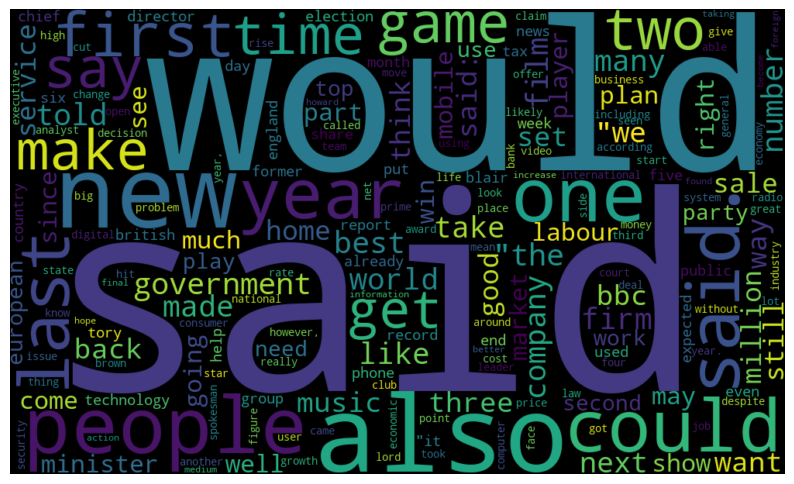

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Not bad at all, if I do say so myself!  I can see that the top 2 words within our dataset are 'would', 'said'. 

###### N-grams
are groups of words from a text. For example, in "I love ice cream," bigrams (groups of two words) would be ["I love", "love ice", "ice cream"]. Unigrams are single words like ["I", "love", "ice", "cream"]. Bigrams can give us more information about how words are used together compared to unigrams. The more words you group together, the more specific the information gets, but if you group too many, you might miss out on the broader context.

In [46]:
#regenerate the tokens list, remember we did more data cleaning since we last generated this list
tokens = ' '.join(bbc_data.clean_text).split()

In [47]:
# creating the bigrams
ngrams_2 = nltk.bigrams(tokens)

# freq distribution for these
freq_2grams = pd.Series(ngrams_2).value_counts().to_dict()
list(freq_2grams.items())[:20]

[(('told', 'bbc'), 324),
 (('prime', 'minister'), 249),
 (('chief', 'executive'), 180),
 (('said', 'would'), 173),
 (('last', 'year'), 159),
 (('tony', 'blair'), 146),
 (('bbc', 'news'), 137),
 (('mobile', 'phone'), 134),
 (('liberal', 'democrat'), 133),
 (('new', 'york'), 126),
 (('six', 'nation'), 126),
 (('number', 'one'), 121),
 (('last', 'year,'), 120),
 (('last', 'year.'), 115),
 (('bbc', 'radio'), 109),
 (('first', 'time'), 108),
 (('michael', 'howard'), 101),
 (('also', 'said'), 99),
 (('human', 'right'), 98),
 (('interest', 'rate'), 95)]

Awesome!  Let's try generating `trigrams()` now.

In [48]:
# creating the bigrams
ngrams_3 = nltk.trigrams(tokens)

# freq distribution for these
freq_3grams = pd.Series(ngrams_3).value_counts().to_dict()
list(freq_3grams.items())[:20]

[(('told', 'bbc', 'news'), 107),
 (('told', 'bbc', 'radio'), 73),
 (('bbc', 'radio', "4's"), 58),
 (('radio', "4's", 'today'), 53),
 (('bbc', 'news', 'website.'), 51),
 (('leader', 'michael', 'howard'), 47),
 (('tory', 'leader', 'michael'), 41),
 (('bbc', 'news', 'website'), 40),
 (('million', 'dollar', 'baby'), 32),
 (('prime', 'minister', 'tony'), 31),
 (('leader', 'charles', 'kennedy'), 29),
 (('world', 'number', 'one'), 24),
 (('told', 'bbc', 'sport.'), 24),
 (('deputy', 'prime', 'minister'), 22),
 (('told', 'bbc', 'news:'), 22),
 (('foreign', 'secretary', 'jack'), 22),
 (('minister', 'tony', 'blair'), 22),
 (('consumer', 'electronics', 'show'), 21),
 (('coach', 'andy', 'robinson'), 21),
 (('secretary', 'charles', 'clarke'), 21)]

Comparing the bigrams with the trigrams, we can see that same of the trigrams contain a lot of information as to what the post is about.

#### Part of Speech (POS)
Back in elementary school you learnt the difference between nouns, verbs, adjectives, and adverbs. These "word classes" are not just the idle invention of English teachers, but are useful categories for many language processing tasks. 

The process of classifying words into their parts of speech and labeling them accordingly is known as part-of-speech tagging, POS-tagging, or simply tagging. Parts of speech are also known as word classes or lexical categories. The collection of tags used for a particular task is known as a tagset. Our emphasis in this chapter is on exploiting tags, and tagging text automatically.

In [49]:
from nltk.tag import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')

pos_tags = pos_tag(tokens)
pos_tags[:20]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\balar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('economy', 'NN'),
 ('facing', 'VBG'),
 ("'major", 'JJ'),
 ("risks'", 'NN'),
 ('manufacturing', 'NN'),
 ('sector', 'NN'),
 ('continue', 'VBP'),
 ('face', 'VBP'),
 ('"serious', 'JJ'),
 ('challenges"', 'NNS'),
 ('next', 'IN'),
 ('two', 'CD'),
 ('years,', 'JJ'),
 ('british', 'JJ'),
 ('chamber', 'NN'),
 ('commerce', 'NN'),
 ('(bcc)', 'NNP'),
 ('said.', 'NN'),
 ("group's", 'VBD'),
 ('quarterly', 'JJ')]

Okay?  What does all of that mean?  NN? VBG? 

Those are the tags assocaiated with the POS tagging process. 
'NN' --> singular noun, 'VBG' -->present verb, 'WRB' --> adverb.

You can read more about the individual classes in POS tagging [here](https://www.learntek.org/blog/categorizing-pos-tagging-nltk-python/).

How about we see about creating a frequency distribution for the parts of speech in our dataset?

In [50]:
from collections import Counter

Counter([j for i,j in pos_tag(tokens)])

Counter({'NN': 225919,
         'JJ': 100386,
         'VBD': 32321,
         'RB': 20946,
         'VBG': 18333,
         'CD': 15053,
         'VBP': 13328,
         'VBN': 10911,
         'VB': 10382,
         'NNS': 10060,
         'NNP': 8549,
         'IN': 8288,
         'MD': 5262,
         'VBZ': 3843,
         'JJS': 2298,
         'JJR': 1585,
         'RBR': 824,
         'DT': 762,
         'FW': 644,
         'RP': 401,
         'CC': 354,
         'POS': 317,
         'WP': 209,
         'RBS': 161,
         '$': 130,
         'WP$': 122,
         'PRP': 79,
         'WRB': 76,
         'WDT': 60,
         ':': 22,
         'PRP$': 21,
         'EX': 19,
         "''": 7,
         'UH': 7,
         'NNPS': 5,
         'PDT': 2})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'NN'),
  Text(1, 0, 'JJ'),
  Text(2, 0, 'VBD'),
  Text(3, 0, 'RB'),
  Text(4, 0, 'VBG'),
  Text(5, 0, 'CD'),
  Text(6, 0, 'VBP'),
  Text(7, 0, 'VBN'),
  Text(8, 0, 'VB'),
  Text(9, 0, 'NNS'),
  Text(10, 0, 'NNP'),
  Text(11, 0, 'IN'),
  Text(12, 0, 'MD'),
  Text(13, 0, 'VBZ'),
  Text(14, 0, 'JJS'),
  Text(15, 0, 'JJR'),
  Text(16, 0, 'RBR'),
  Text(17, 0, 'DT'),
  Text(18, 0, 'FW'),
  Text(19, 0, 'RP')])

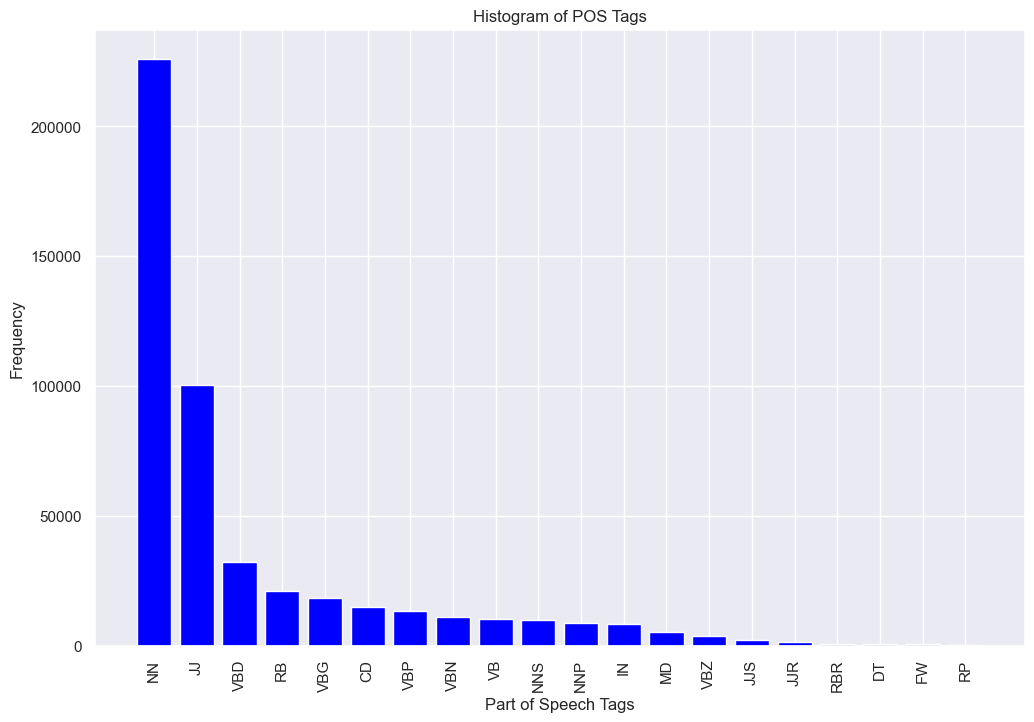

In [53]:
import matplotlib.pyplot as plt

# data from above input
pos_tags = {'NN': 225919, 'JJ': 100386, 'VBD': 32321, 'RB': 20946, 'VBG': 18333, 'CD': 15053, 'VBP': 13328,
            'VBN': 10911, 'VB': 10382, 'NNS': 10060, 'NNP': 8549, 'IN': 8288, 'MD': 5262, 'VBZ': 3843,
            'JJS': 2298, 'JJR': 1585, 'RBR': 824, 'DT': 762, 'FW': 644, 'RP': 401}

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(pos_tags.keys(), pos_tags.values(), color='blue')

# Adding labels and title
plt.xlabel('Part of Speech Tags')
plt.ylabel('Frequency')
plt.title('Histogram of POS Tags')
plt.xticks(rotation=90)  # Rotate


POS (Part of Speech) analysis helps you compare how different authors use language. For example, you can see if one author uses more nouns

#### Topic Modeling with Gensim
Topic modeling is a way to analyze lots of text data by finding groups of words that often appear together. This technique helps to understand the main themes in large collections of text without needing to read everything. It’s called ‘unsupervised’ because it organizes data into topics on its own, without needing any help or labels from humans.

For example, if a software company wants to understand customer feedback about their product, topic modeling can identify what customers are frequently discussing, such as specific features or issues, by spotting patterns like which words appear together often.

This method can quickly show what large amounts of text are about, making it easier to focus on particular subjects in the data. There are also 'supervised' methods where the machine learning model is trained on known data before it analyzes new text, but topic modeling doesn't need this step.
References:
> Topic Modeling: An Introduction <br>
> https://monkeylearn.com/blog/introduction-to-topic-modeling/

> Topic Modeling with Gensim (Python) <br>
> https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

First thing we are going to need is a list of list of our lemmatized text. This means each row of lemmatized text --> list  of individual lemmas, then each row list is added to a larger list.

In [54]:
lem_ls = list(bbc_data.clean_text.apply(lambda x: list(x.split())))
print(lem_ls[:2])

[['economy', 'facing', "'major", "risks'", 'manufacturing', 'sector', 'continue', 'face', '"serious', 'challenges"', 'next', 'two', 'years,', 'british', 'chamber', 'commerce', '(bcc)', 'said.', "group's", 'quarterly', 'survey', 'company', 'found', 'export', 'picked', 'last', 'three', 'month', '2004', 'best', 'level', 'eight', 'years.', 'rise', 'came', 'despite', 'exchange', 'rate', 'cited', 'major', 'concern.', 'however,', 'bcc', 'found', 'whole', 'economy', 'still', 'faced', '"major', 'risks"', 'warned', 'growth', 'set', 'slow.', 'recently', 'forecast', 'economic', 'growth', 'slow', '2004', 'little', '2.5%', '2005', '2006.', "manufacturers'", 'domestic', 'sale', 'growth', 'fell', 'back', 'slightly', 'quarter,', 'survey', '5,196', 'firm', 'found.', 'employment', 'manufacturing', 'also', 'fell', 'job', 'expectation', 'lowest', 'level', 'year.', '"despite', 'positive', 'news', 'export', 'sector,', 'worrying', 'sign', 'manufacturing,"', 'bcc', 'said.', '"these', 'result', 'reinforce', 'co

In [61]:
!pip install -U gensim
!pip install pyLDAvis
!pip install --upgrade smart_open
!pip install funcy


   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB 1.3 MB/s eta 0:00:19
    --------------------------------------- 0.6/24.0 MB 7.0 MB/s eta 0:00:04
   -- ------------------------------------- 1.4/24.0 MB 12.7 MB/s eta 0:00:02
   --- ------------------------------------ 2.3/24.0 MB 13.2 MB/s eta 0:00:02
   ----- ---------------------------------- 3.1/24.0 MB 15.1 MB/s eta 0:00:02
   ------ --------------------------------- 3.9/24.0 MB 15.5 MB/s eta 0:00:02
   ------- -------------------------------- 4.7/24.0 MB 15.0 MB/s eta 0:00:02
   --------- ------------------------------ 5.6/24.0 MB 15.4 MB/s eta 0:00:02
   ---------- ----------------------------- 6.3/24.0 MB 15.5 MB/s eta 0:00:02
   ----------- ---------------------------- 7.1/24.0 MB 16.2 MB/s eta 0:00:02
   ------------- -------------------------- 7.9/24.0 MB 15.8 MB/s eta 0:00:02
   -------------- ------------------------- 8.7/24.0 MB 15.9 MB/s eta 0:00

There are a number of models available to use for topic modeling.  I have decided to use the Gensim package which uses Latent Dirichlet Allocation (LDA). LDA’s approach to topic modeling is it considers each document as a collection of topics in a certain proportion. And each topic as a collection of keywords, again, in a certain proportion.

In [62]:
# Gensim
import gensim
import gensim.corpora as corpora

At this point we will need to construct a dictionary of our lemmatized terms and a term document frequency (TDF) for our dataset. 

TDF is a matrix that track the number of times each word, across the entire dataset, appears within each document in the the dataset. As an example, our TDF will track the number of times the word 'messge' appears in each of the posts within our dataset.

In [63]:
# Create Dictionary
id2word = corpora.Dictionary(lem_ls)

# Term Document Frequency Corpus
#texts = lem_ls
corpus = [id2word.doc2bow(post) for post in lem_ls]

We have everything required to train the LDA model. In addition to the corpus and dictionary, you need to provide the number of topics as well.

`random_state` is the same as we have seen with our other ML lessons. `chunksize` is the number of documents to be used in each training chunk. `passes` controls how oftern we train the model on the entire corpus.

In [64]:
# Build Basic LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

Time to look at the results!

In [65]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())

[(0, '0.006*"said" + 0.005*"new" + 0.003*"people" + 0.003*"also" + 0.003*"one" + 0.003*"said." + 0.002*"mac" + 0.002*"could" + 0.002*"would" + 0.002*"home"'), (1, '0.011*"said" + 0.007*"would" + 0.005*"labour" + 0.005*"blair" + 0.004*"party" + 0.004*"new" + 0.004*"election" + 0.004*"also" + 0.004*"people" + 0.004*"tory"'), (2, '0.012*"said" + 0.007*"people" + 0.006*"would" + 0.005*"also" + 0.005*"new" + 0.004*"could" + 0.003*"said." + 0.003*"mobile" + 0.003*"make" + 0.003*"phone"'), (3, '0.010*"film" + 0.009*"best" + 0.006*"said" + 0.005*"award" + 0.004*"also" + 0.004*"one" + 0.004*"number" + 0.003*"star" + 0.003*"new" + 0.003*"people"'), (4, '0.011*"said" + 0.007*"would" + 0.006*"government" + 0.005*"people" + 0.004*"could" + 0.004*"mobile" + 0.004*"lord" + 0.003*"also" + 0.003*"said." + 0.003*"say"'), (5, '0.007*"said" + 0.003*"also" + 0.003*"year" + 0.003*"sale" + 0.003*"would" + 0.003*"company" + 0.003*"oil" + 0.003*"last" + 0.003*"firm" + 0.003*"economy"'), (6, '0.008*"said" + 0.0

##### View Model Output
How to interpret this?

Topic 9 is represented as ( '0.009*"said" + 0.004*"would" + 0.003*"new" + 0.003*"could" + 0.003*"firm" + 0.003*"say" + 0.002*"one" + 0.002*"search" + 0.002*"also" + 0.002*"use"')

Meaning the top 10 words in Topic 9 are: said, would, new, could, firm, say, one, search, also, use.

The numeric values in front of each word reflects the importance of that word within the topic.

##### Evaluation of Model
To evaluate the performance of a topic modeling project, we use something called a coherence score. This score helps us understand how well the topics generated by our model make sense together. Higher coherence scores indicate that the words in each topic support each other well, making the topics clearer and more meaningful.

There are different types of coherence scores, such as:
- **c_v**: This score looks at the top words in each topic, checks how often they appear close to each other in the texts, and combines this information with their similarity.
- **c_p**, **c_uci**, and **c_a** are other scores that use various methods to measure how much the top words in a topic relate to each other.

We will use the **c_v** score to evaluate our model because it gives a good balance of how words co-occur and how similar they are, helping us see if our model's topics make sense.

In [66]:
from gensim.models import CoherenceModel

# compute the coherence score
coherence_model_lda = CoherenceModel(model=lda_model, 
                                     texts=lem_ls, 
                                     dictionary=id2word, 
                                     coherence='c_v')

# retreive the coherence_scores
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3315922955046958


##### Optimizing the Model
Like we saw with our KNN and kMeans algorithms, the nnumber of neighbors or cluster, effects the performance of an algorithm. so let's vary the number of topics and compare coherence scores.

In [67]:
# range of 2 to 15 topics

scores = []
for i in range(2,15):
    print(f'Calcuting for {i} topics')
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
    # compute the coherence score
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=lem_ls, 
                                         dictionary=id2word, 
                                         coherence='c_v')

    # retreive the coherence_scores
    coherence_lda = coherence_model_lda.get_coherence()
    
    scores.append((i,coherence_lda))


Calcuting for 2 topics
Calcuting for 3 topics
Calcuting for 4 topics
Calcuting for 5 topics
Calcuting for 6 topics
Calcuting for 7 topics
Calcuting for 8 topics
Calcuting for 9 topics
Calcuting for 10 topics
Calcuting for 11 topics
Calcuting for 12 topics
Calcuting for 13 topics
Calcuting for 14 topics


In [68]:
scores

[(2, 0.24991126163484914),
 (3, 0.27270444118969195),
 (4, 0.31739347270076845),
 (5, 0.3182455571797473),
 (6, 0.29204486342189034),
 (7, 0.3315935388212384),
 (8, 0.3009835458378617),
 (9, 0.3148444370905121),
 (10, 0.3148715761377262),
 (11, 0.29247202421293594),
 (12, 0.3092434073371209),
 (13, 0.32598026350896536),
 (14, 0.31198638952639157)]

Let's create a best_fit model, based on the best coherence score above.

In [69]:
bf_lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=11, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

##### Visualizing the Topics
pyLDAvis produces an interactive visual of your topic model. A good topic model will have equal sized, non-overlapping, bubbles evenly scattered throughout the chart.

This chart is interactive and will change as you mouse-over various objects (bubbles, word list, etc) in the graph.
* Each bubble represents a topic. The larger the bubble, the higher percentage of of news articles represented by the topic.
* Blue bars represent the overall frequency of each word in the corpus. If no topic is selected, the blue bars of the most frequently used words will be displayed.
* Red bars give the estimated number of times a given term was generated by a given topic. 
* The further the bubbles are away from each other, the more different they are.

In [72]:
# Packages necessry to support the visualization of the topic model
import pyLDAvis
import pyLDAvis.gensim_models

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(bf_lda_model, corpus, id2word)

In [75]:
# Saving the visualization to a html. Open this in another browser window
pyLDAvis.save_html(LDAvis_prepared,'Z:/topic_model_viz.html')

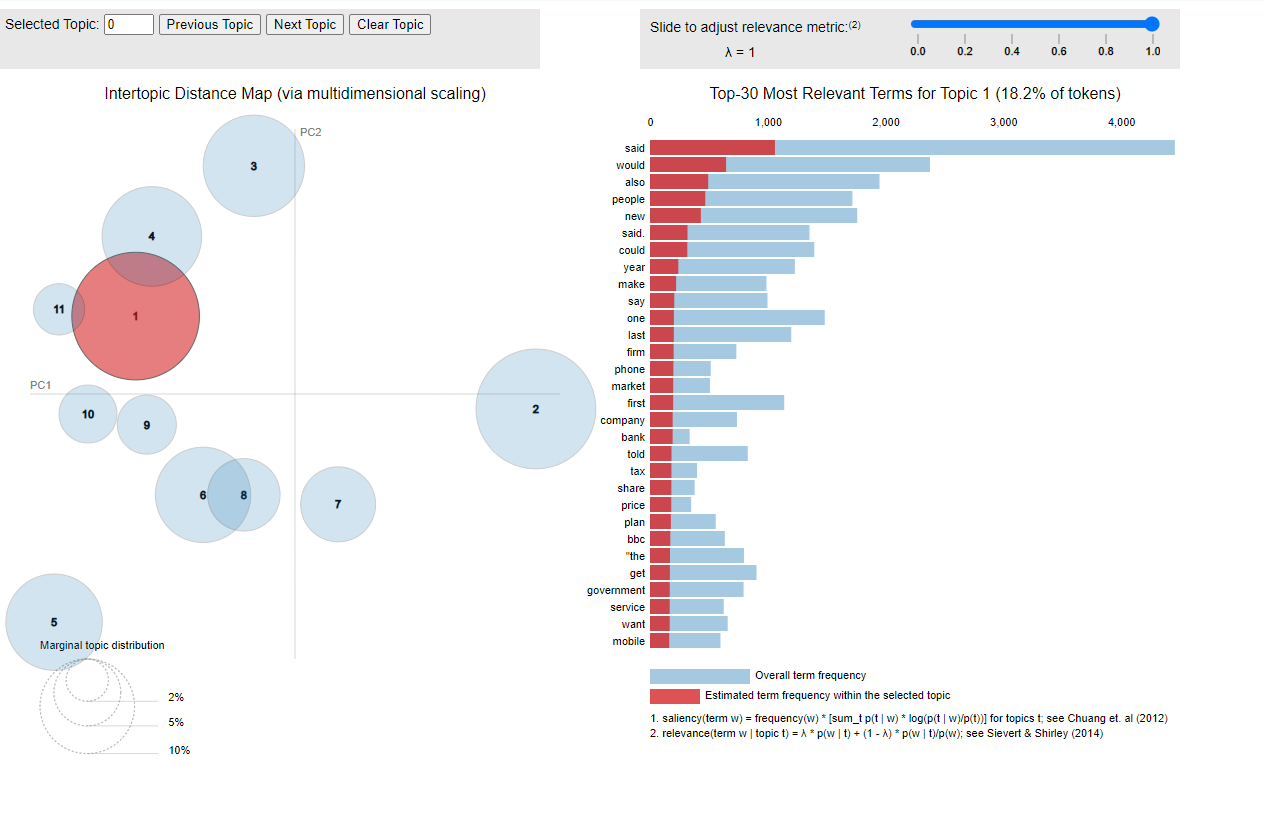

I cannot run it here, so iam attaching the dowloaded file in wordclass for reffering and coming to screenshot

The screenshot shows a visualization from PyLDAvis, highlighting themes from a text dataset:

1. **Topic Sizes and Placement**:
   - **Topic 1** is the largest, showing it's a major theme, covering 18.2% of the text.
   - It's central, suggesting it shares vocabulary with many other topics.

2. **Top Terms in Topic 1**:
   - Common words like "said," "company," "bank," and "government" indicate the topic is likely about business or politics.
   - The word "said" is very prominent, suggesting many quotes or reports in the text.

3. **Relevance Metric**:
   - The terms are ranked by how often they appear in Topic 1, giving a sense of what this topic is mostly about.

This tool is helpful for identifying and exploring the main themes in a collection of texts, such as finding out what's commonly discussed in business or political news.

#### Summary



1. Getting to Know the Data: 
We started by looking at a bunch of BBC News articles. These articles covered different topics like business, entertainment, politics, sport, and tech.
2. Cleaning Up the Text: 
Before we could dig into the juicy stuff, we needed to tidy up the articles a bit. We made everything lowercase, got rid of any weird symbols, numbers, and common words that don't add much meaning (like "and," "the," etc.).
3. Checking Out the Words:  
We wanted to know which words were the superstars of these articles and which ones were just hanging out in the background. So, we figured out the most and least popular words.
4. Creating a Word Cloud: 
Ever seen those cool pictures made up of words where the important ones are big? That's what we made next. It gave us a visual of which words were popping up a lot in the articles.
5. Exploring Word Combos and Parts of Speech: 
We got a bit fancier here. We looked at pairs and groups of words that showed up together often. Plus, we played a game of sorts where we tagged each word with its job in the sentence, like if it's a noun, verb, or adjective.
6. Finding the Main Topics: 
Now, this was the big one. We wanted to know what each article was mainly about. So, we used a smart tool called Latent Dirichlet Allocation (LDA) to group similar articles together based on their words. It's like sorting them into different buckets without knowing what's written on them.
7. Checking How Well Our Topics Made Sense: 
We didn't stop there. We wanted to see if our topic groups actually made sense. So, we gave them a score to see if the words in each group went well together.
8. Seeing Our Topics in Action: 
Finally, we made a cool interactive chart to visualize our topics. It's like a map showing where each group of articles belongs and how they connect.

#### Coclusion

The insights and valuable thoughts gained from our exploration:

1. **Understanding the News Landscape**: By analyzing the BBC News articles, we gained insights into the diverse topics covered by the media outlet. We saw a mix of business updates, entertainment gossip, political discussions, sports highlights, and tech innovations. This reflects the breadth of information that people consume in their daily lives.

2. **Identifying Popular Themes**: Through word frequency analysis and topic modeling, we discovered the recurring themes and subjects that dominated the articles. These insights can help us understand what topics are trending or of significant interest to the readership during that time period.

3. **Language Patterns and Usage**: Exploring word combinations, parts of speech, and word clouds provided insights into language patterns and usage within the dataset. We could observe which words frequently appeared together, the predominant types of words used (nouns, verbs, adjectives), and the overall tone or style of the writing.

4. **Topic Coherence and Relevance**: Assessing the coherence of the topics generated by the model helped us evaluate how well they represented meaningful themes. Higher coherence scores indicated that the topics formed logical and coherent clusters of related words, enhancing our confidence in the topic modeling results.

5. **Optimizing Model Performance**: Through iterative adjustments and fine-tuning of the LDA model, we aimed to optimize its performance in capturing meaningful topics from the text data. This iterative process highlighted the importance of experimentation and refinement to achieve better results.

6. **Visual Representation of Topics**: The interactive visualization provided by PyLDAvis offered a rich and intuitive way to explore the identified topics. It allowed us to visually navigate through the topic clusters, understand their relationships, and delve deeper into the content of each topic.

7. **Application in Information Retrieval**: The insights and techniques gained from this analysis can have practical applications in information retrieval, content recommendation, and text summarization systems. By understanding the underlying themes and patterns in large text datasets, we can develop more effective tools for organizing and accessing information.

Overall, our exploration of the BBC News articles provided valuable insights into text analytics techniques, language patterns, and the underlying themes present in the dataset. These insights can inform further research, decision-making processes, and the development of intelligent information processing systems.